<a href="https://colab.research.google.com/github/Ad603-tech/Self-driving-car/blob/main/Deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [16]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

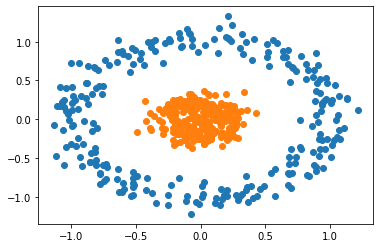

In [17]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [18]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics=['accuracy'])


In [19]:
 h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8835 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7360 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4760
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.3500
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.3900
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5380
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5080
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4660
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.6140
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5020
Epoch 11/

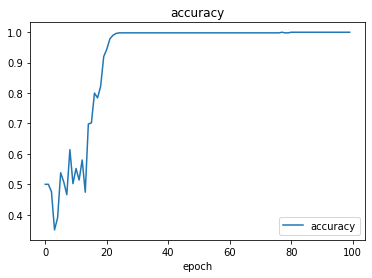

In [20]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

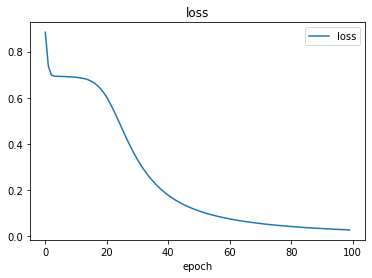

In [21]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [23]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
  y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

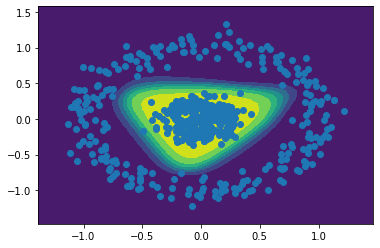

In [24]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.9819779]]


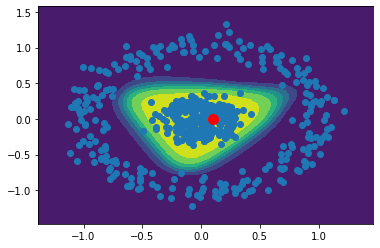

In [26]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o", markersize=10, color="red")
print("Prediction is:", prediction)